# Vehicle dataset
 Used Cars data form websites

### About this Dataset

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

1.name                       
2.year            
3.selling_price                
4.km_driven         
5.fuel     
6.seller_type      
7.transmission    
8.Owner     
9.mileage      
10.engine      
11.max_power         
12.torque     
13.seats

For more information about this datasets please go to https://www.kaggle.com/nehalbirla/motorcycle-dataset

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

In [2]:
df=pd.read_csv('Car details v3.csv')

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### Feature Transformation

####  1- Data Cleaning

In [6]:
df.duplicated().sum()

1202

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.shape

(6926, 13)

#### 2- Missing Data

In [9]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [10]:
df.isnull().sum()/len(df*100)

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.030032
engine           0.030032
max_power        0.029599
torque           0.030176
seats            0.030032
dtype: float64

In [11]:
df[df.torque.isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7740,Hyundai Santro Xing XG,2004,70000,70000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


> As we can see for all the torque null values, mileage, engine, max_power and seats also have null values in the data. so we will drop these rows from the dataset

In [12]:
df=df[~(df.torque.isnull())]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [13]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

### 3- Checking Outliers

In [14]:
from datasist.structdata import detect_outliers
outliers_indices = detect_outliers(df, 0,['km_driven'])
len(outliers_indices)

161

<AxesSubplot:xlabel='km_driven'>

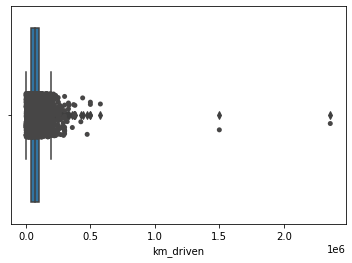

In [16]:
sns.boxplot(x='km_driven', data=df)
sns.stripplot(x='km_driven', data=df, color="#474646")

In [18]:
outliers_indices = detect_outliers(df, 0,['selling_price'])
len(outliers_indices)

306

<AxesSubplot:xlabel='selling_price'>

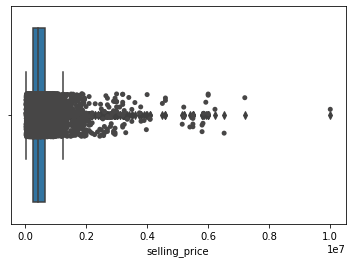

In [20]:
sns.boxplot(x='selling_price', data=df)
sns.stripplot(x='selling_price', data=df, color="#474646")

### Feature Engineering

In [35]:
df['car_age']=2022-df['year']
df.drop('year',axis=1,inplace=True)

In [36]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,8
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,8
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,16
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,12
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0,9
8122,Hyundai i20 Magna 1.4 CRDi,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0,8
8123,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,9
8124,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,15


In [37]:
mileage=df['mileage'].str.split(expand=True)[0]
df['mileage']=mileage
df['mileage']=df['mileage'].astype('float')

In [38]:
engine=df['engine'].str.split(expand=True)[0]
df['engine']=engine
df['engine']=df['engine'].astype('float')

In [39]:
maxPower=df['max_power'].str.split(expand=True)[0]
df['max_power']=maxPower
for x in df.index:
    if (df.loc[x, 'max_power'] == 'bhp'):
        df.drop(x, inplace = True)
df['max_power']=df['max_power'].astype('float')

In [40]:
torque=df['torque'].str.split('N',expand=True)[0]
df['torque']=torque

In [41]:
torque=df['torque'].str.split('@',expand=True)[0]
df['torque']=torque

In [42]:
torque=df['torque'].str.split(' ',expand=True)[0]
df['torque']=torque
torque=df['torque'].str.split('n',expand=True)[0]
df['torque']=torque
torque=df['torque'].str.split('k',expand=True)[0]
df['torque']=torque
torque=df['torque'].str.split('(',expand=True)[0]
df['torque']=torque
df['torque']=df['torque'].astype('float')

In [43]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0,8
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0,8
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7,5.0,16
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0,12
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5,5.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.0,5.0,9
8122,Hyundai i20 Magna 1.4 CRDi,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7,5.0,8
8123,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7,5.0,9
8124,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,24.0,5.0,15


## EDA and Visualization

### 1- HeatMap: 
**To illustrate the correlation between the features.**

<AxesSubplot:>

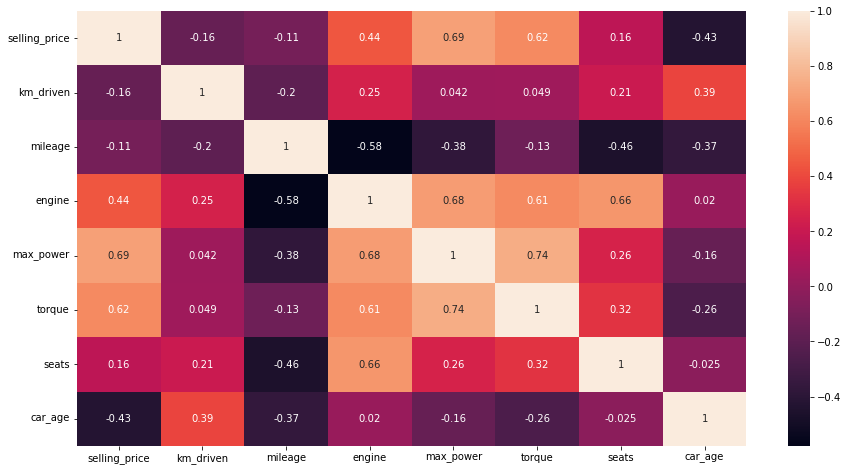

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

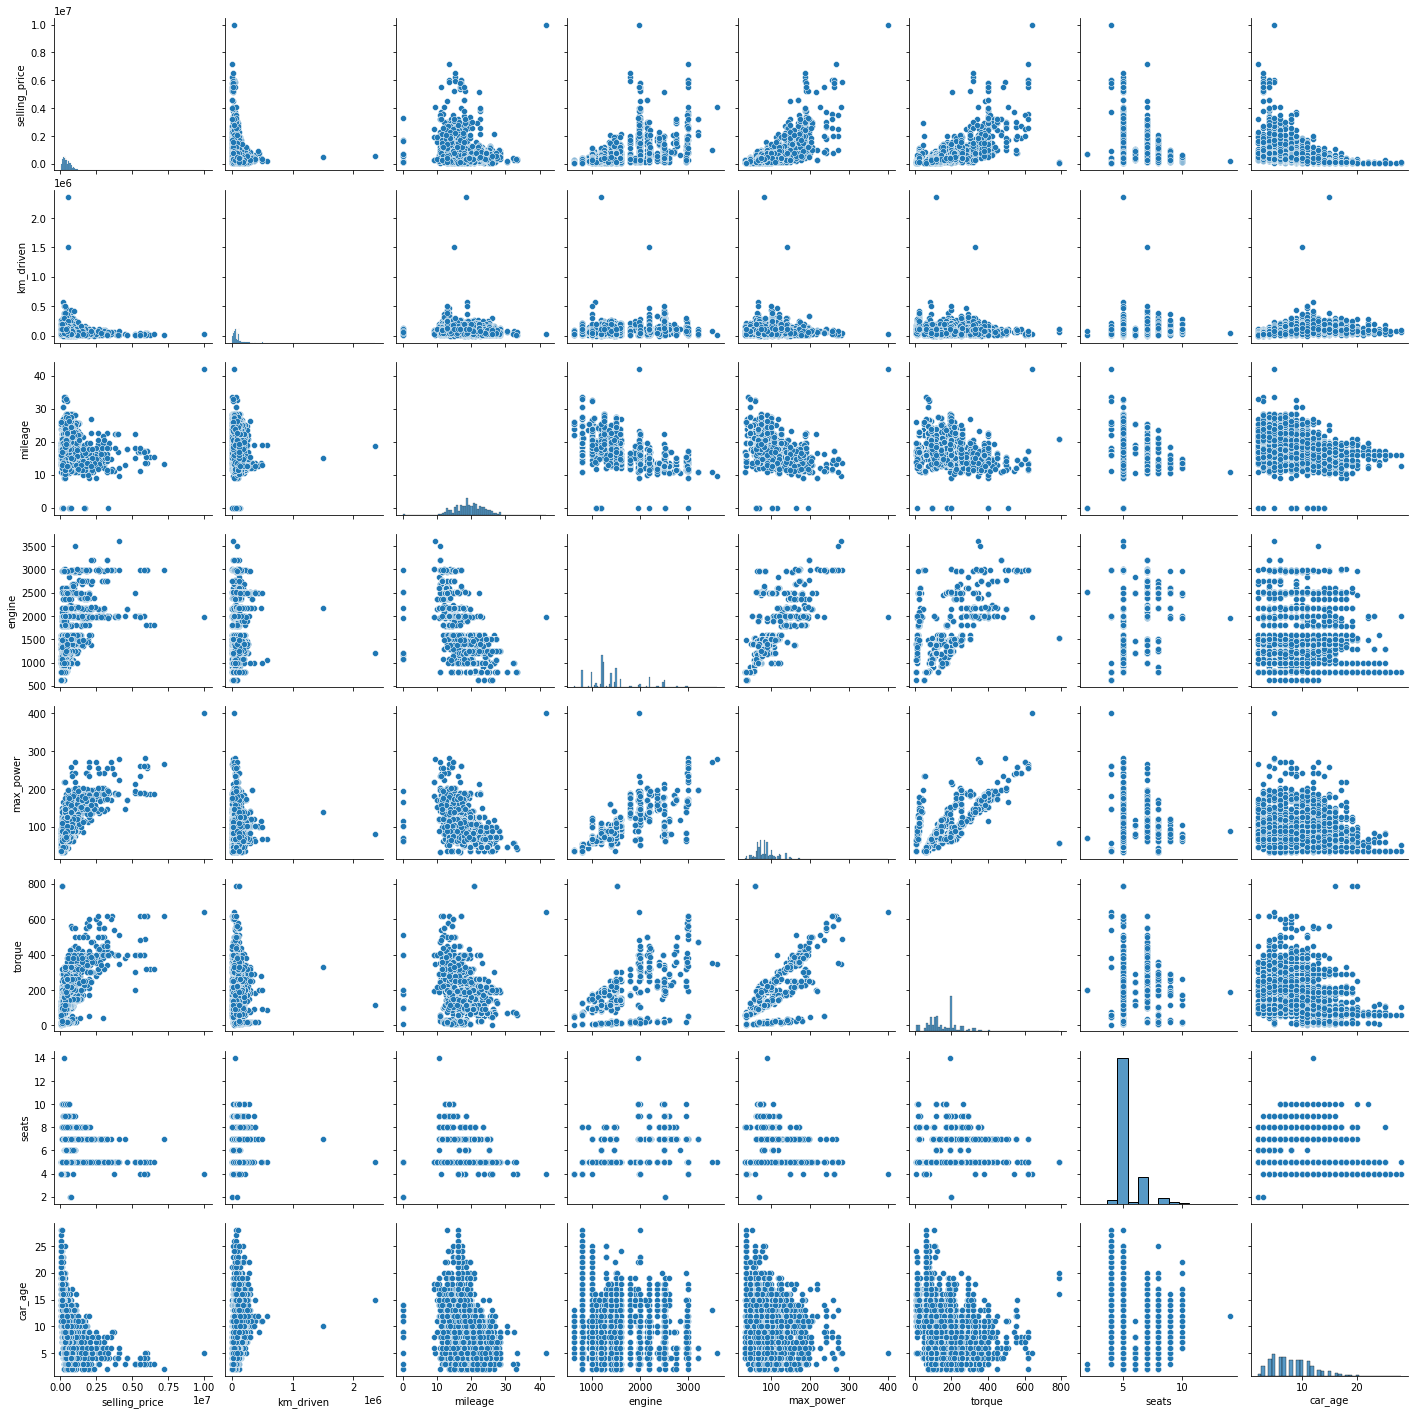

In [45]:
sns.pairplot(df)

## Visualizing the categorical data :

## 1. Seller Type

<AxesSubplot:xlabel='seller_type', ylabel='count'>

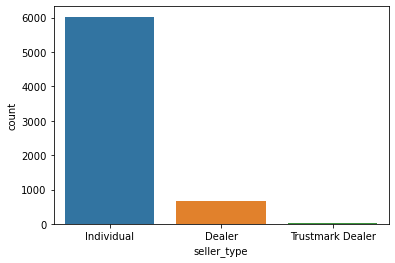

In [46]:
sns.countplot(x='seller_type',data=df)

**The selling price for a vehicle sold by a Dealer vs Individual:**

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

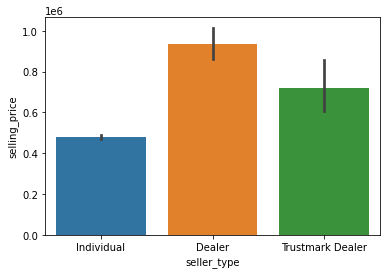

In [47]:
sns.barplot(x='seller_type', y='selling_price', data=df)

> Dealers can sell vehicles at a higher selling price than a general individual. No surprises at all !

## 2. Transmission

<AxesSubplot:xlabel='transmission', ylabel='count'>

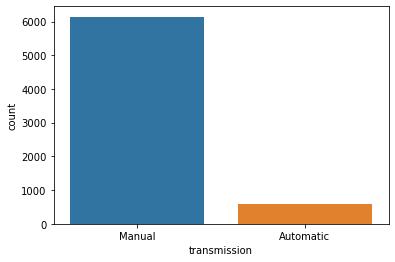

In [48]:
sns.countplot(x='transmission',data=df)

**The selling price for manual and automatic vehicles:**

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

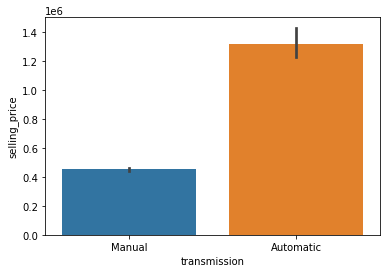

In [49]:
sns.barplot(x='transmission', y='selling_price', data=df)

> We can see tha automatic vehicles are found to have a large resale value in the market compared to manual transmission.



## 3. Fuel Type 

<AxesSubplot:xlabel='fuel', ylabel='count'>

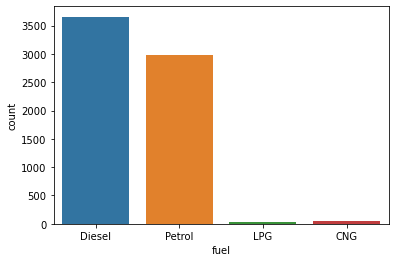

In [50]:
sns.countplot(x='fuel',data=df)

**The selling price based on different types of engine fuel:**

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

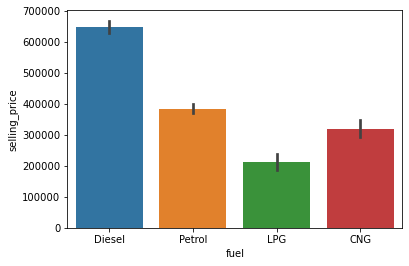

In [51]:
sns.barplot(x='fuel', y='selling_price', data=df)

> Diesel Engine Vehicles are found to have the highest selling price amongst Petrol and CNG engine vehicles



## 4. Owner Type

<AxesSubplot:xlabel='owner', ylabel='count'>

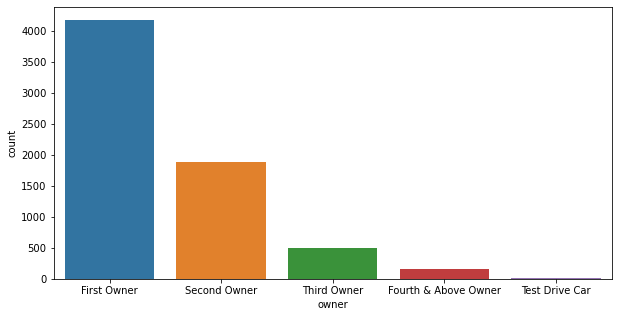

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x='owner',data=df)

**The selling price based on the type of owner:**

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

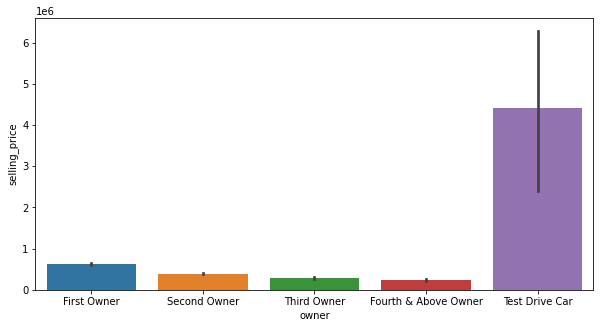

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x='owner', y='selling_price', data=df)

> It seems that the vehicles belonging to owner 0 have the highest selling price

## Visualizing the relationship between Target Variable[Selling price] against Numerical Features:

## 1. Kms Driven

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

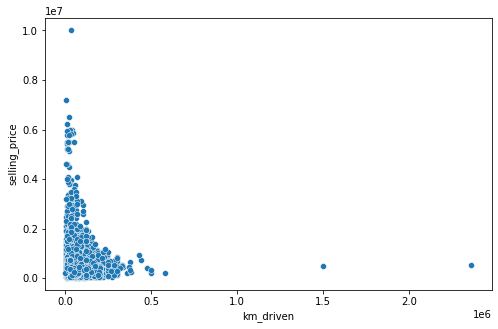

In [59]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='km_driven',y='selling_price',data=df)

> The selling price is found to be higher for vehicles with less kms covered !

## 2. Car Age

<AxesSubplot:xlabel='car_age', ylabel='selling_price'>

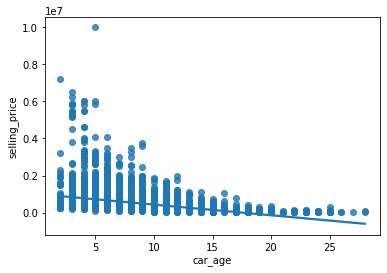

In [60]:
sns.regplot(x='car_age',y='selling_price',data=df)

> It seems the selling price decreases overall for older/ageing vehicles!

## 3. Engine

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

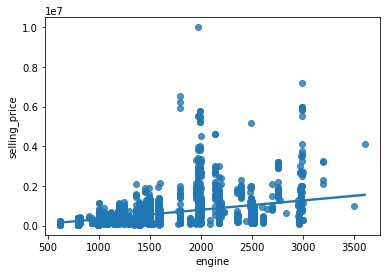

In [61]:
sns.regplot(x='engine',y='selling_price',data=df)

> The selling price is found to be higher with vehicles with higher engine power !

## 4. Torque

<AxesSubplot:xlabel='torque', ylabel='selling_price'>

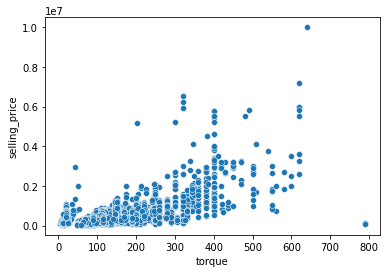

In [63]:
sns.scatterplot(x='torque',y='selling_price',data=df)

> As the torque of the vehicles increases the selling price also increase!

## Relation between Engine and Torque 

<AxesSubplot:xlabel='engine', ylabel='torque'>

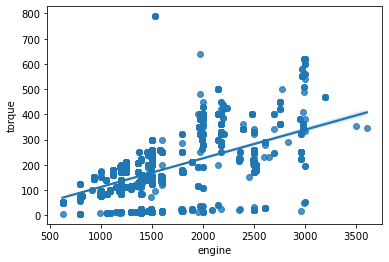

In [70]:
sns.regplot(x='engine',y='torque',data=df)

> It seems that the correlation between the Torque and the engine is highly positive!

## Relation between mileage and the engine

<AxesSubplot:xlabel='engine', ylabel='mileage'>

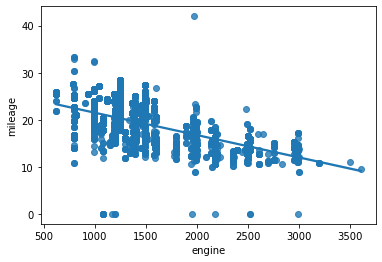

In [68]:
sns.regplot(x='engine',y='mileage',data=df)

> As the mileage of the vehicles decreases the engine power increases.

## Top 20 vehicles have the highest selling price

In [105]:
df.groupby('name')['selling_price'].max().sort_values(ascending = False)

name
Volvo XC90 T8 Excellence BSIV       10000000
BMW X7 xDrive 30d DPE                7200000
Audi A6 35 TFSI Matrix               6523000
Mercedes-Benz S-Class S 350 CDI      6000000
BMW 6 Series GT 630d Luxury Line     6000000
                                      ...   
Maruti 800 AC Uniq                     50000
Tata Indica V2 DiCOR DLG BS-III        50000
Maruti 800 DX BSII                     45000
Tata Nano LX SE                        45000
Maruti Zen Std                         45000
Name: selling_price, Length: 1982, dtype: int64

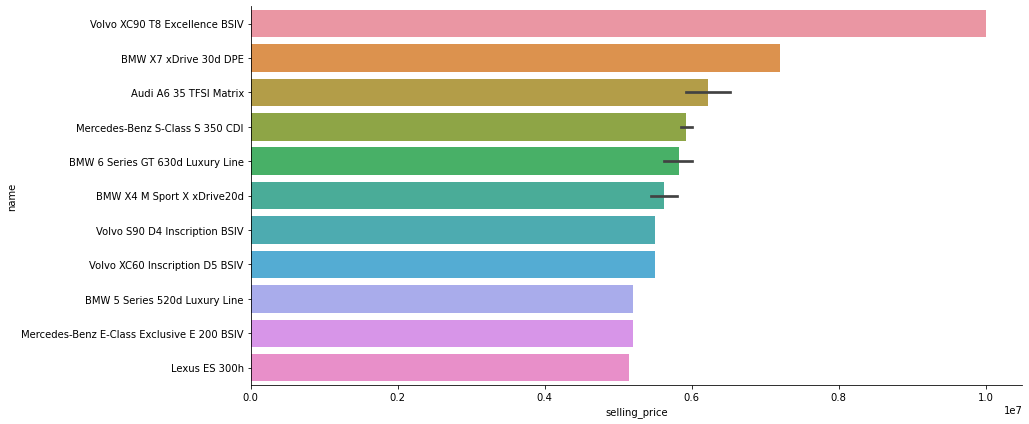

In [104]:
z= df.loc[df.selling_price.sort_values(ascending = False).head(20).index]
sns.catplot(data = z, kind = 'bar', height = 6, aspect = 2.4, y = 'name', x = 'selling_price')

## Preparing the Data before training

### Another step in Feature Transformation:
We shall convert categorical features to numeric type!

In [107]:
data=df.drop('name',axis=1)

In [108]:
data=pd.get_dummies(data,drop_first=True)

In [109]:
data

,selling_price,km_driven,mileage,engine,max_power,torque,seats,car_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248.0,74.00,190.0,5.0,8,1,0,0,1,0,1,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,250.0,5.0,8,1,0,0,1,0,1,0,1,0,0
2,158000,140000,17.70,1497.0,78.00,12.7,5.0,16,0,0,1,1,0,1,0,0,0,1
3,225000,127000,23.00,1396.0,90.00,22.4,5.0,12,1,0,0,1,0,1,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,11.5,5.0,15,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,260000,50000,18.90,998.0,67.10,90.0,5.0,9,0,0,1,1,0,1,0,1,0,0
8122,475000,80000,22.54,1396.0,88.73,219.7,5.0,8,1,0,0,1,0,1,0,1,0,0
8123,320000,110000,18.50,1197.0,82.85,113.7,5.0,9,0,0,1,1,0,1,0,0,0,0
8124,135000,119000,16.80,1493.0,110.00,24.0,5.0,15,1,0,0,1,0,1,1,0,0,0


## Spliting Data to Train and Test Data

In [110]:
x=data.drop('selling_price',axis=1)
x

,km_driven,mileage,engine,max_power,torque,seats,car_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500,23.40,1248.0,74.00,190.0,5.0,8,1,0,0,1,0,1,0,0,0,0
1,120000,21.14,1498.0,103.52,250.0,5.0,8,1,0,0,1,0,1,0,1,0,0
2,140000,17.70,1497.0,78.00,12.7,5.0,16,0,0,1,1,0,1,0,0,0,1
3,127000,23.00,1396.0,90.00,22.4,5.0,12,1,0,0,1,0,1,0,0,0,0
4,120000,16.10,1298.0,88.20,11.5,5.0,15,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,50000,18.90,998.0,67.10,90.0,5.0,9,0,0,1,1,0,1,0,1,0,0
8122,80000,22.54,1396.0,88.73,219.7,5.0,8,1,0,0,1,0,1,0,1,0,0
8123,110000,18.50,1197.0,82.85,113.7,5.0,9,0,0,1,1,0,1,0,0,0,0
8124,119000,16.80,1493.0,110.00,24.0,5.0,15,1,0,0,1,0,1,1,0,0,0


In [111]:
y=data['selling_price']
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8121    260000
8122    475000
8123    320000
8124    135000
8125    382000
Name: selling_price, Length: 6717, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [113]:
x_train

,km_driven,mileage,engine,max_power,torque,seats,car_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2861,120000,13.10,1795.0,127.00,16.6,5.0,16,0,0,1,1,0,0,0,0,0,0
5292,10000,28.40,1248.0,74.02,190.0,5.0,3,1,0,0,1,0,1,0,0,0,0
4141,80000,20.50,1598.0,103.50,250.0,5.0,10,1,0,0,1,0,1,0,1,0,0
3374,15000,24.70,796.0,47.30,69.0,5.0,5,0,0,1,1,0,1,0,0,0,0
6797,80000,19.70,796.0,46.30,62.0,5.0,14,0,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865,70000,17.50,1298.0,85.80,114.0,5.0,11,0,0,1,1,0,1,0,0,0,1
3748,148000,21.12,1248.0,88.80,200.0,5.0,11,1,0,0,1,0,1,0,1,0,0
1889,120000,19.70,796.0,46.30,62.0,5.0,16,0,0,1,1,0,1,1,0,0,0
2946,35000,23.84,1199.0,84.00,114.0,5.0,4,0,0,1,1,0,1,0,1,0,0


In [114]:
y_train

2861    140000
5292    754000
4141    290000
3374    310000
6797     95000
         ...  
5865    275000
3748    149000
1889    120000
2946    409999
3076    560000
Name: selling_price, Length: 5037, dtype: int64

In [115]:
x_test

,km_driven,mileage,engine,max_power,torque,seats,car_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
5162,15500,23.95,998.0,67.10,90.0,5.0,5,0,0,1,1,0,0,0,0,0,0
3707,60000,18.60,1199.0,79.40,108.0,5.0,10,0,0,1,1,0,1,0,0,0,0
2146,50000,22.90,1248.0,74.00,190.0,5.0,10,1,0,0,1,0,1,0,1,0,0
2955,10000,18.90,1197.0,82.00,114.0,5.0,7,0,0,1,1,0,1,0,0,0,0
5387,110000,12.70,2609.0,116.60,28.3,8.0,15,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,15000,22.95,1248.0,74.00,190.0,5.0,3,1,0,0,1,0,1,0,0,0,0
367,70000,20.36,1197.0,78.90,111.7,5.0,12,0,0,1,1,0,1,1,0,0,0
5048,15000,23.10,998.0,67.04,90.0,5.0,5,0,0,1,1,0,1,0,0,0,0
3072,13500,18.90,1197.0,82.00,114.0,5.0,6,0,0,1,1,0,1,0,0,0,0


In [116]:
y_test

5162    350000
3707    180000
2146    330000
2955    486000
5387    375000
         ...  
1740    650000
367     140000
5048    483000
3072    470000
6208    390000
Name: selling_price, Length: 1680, dtype: int64

## Feature Scalling

In [117]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [118]:
data = min_max.fit_transform(x)

In [119]:
data.shape

(6717, 17)

In [120]:
data

array([[0.06164021, 0.55714286, 0.20939597, ..., 0.        , 0.        ,
        0.        ],
       [0.05083721, 0.50333333, 0.29328859, ..., 1.        , 0.        ,
        0.        ],
       [0.05931015, 0.42142857, 0.29295302, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.04660074, 0.44047619, 0.19228188, ..., 0.        , 0.        ,
        0.        ],
       [0.05041356, 0.4       , 0.29161074, ..., 0.        , 0.        ,
        0.        ],
       [0.05083721, 0.45952381, 0.20939597, ..., 0.        , 0.        ,
        0.        ]])